**Abastecimiento de demanda sobre red de transporte**

Grupo:

Tomás Clavijo - 235426 \\
Rafael Núñez - 262843 \\
Martin Bernheim - 209600 \\

a:

**Expresar como programación lineal el problema de abastecer la demanda con costo mínimo y en forma consistente con las restricciones. Identificar el vector de variables, y expresar las restricciones de igualdad y desigualdad.**

\\

Para poder expresar el problema como uno de programación lineal tenemos que

buscar una función de costos a minimizar/maximizar.

$$ min\ costo = min \sum_{i=1}^{6} c_{i}p_{i} = min\  C^{T}X $$

Dado 6 nodos, llamaremos i-nodo a un nodo genérico.



Cada nodo cuenta con:
* pi, cuánto produce, esta será la variable a optimizar. Cada nodo pi puede tener un max.

* di, di >=0 una demanda a satisfacer.

* yij, El costo de trasladar de i a j

\\

El vector X contiene todas las variables a optimizar, siendo pi cuánto se puede producir en un nodo.
\begin{bmatrix}
p_{1} & p_{2} & p_{3} & p_{4} & p_{5} & p_{6}\\
\end{bmatrix}
Y además cuánto es lo que se traslada
\begin{bmatrix}
p_{1} & p_{2} & p_{3} & p_{4} & p_{5} & p_{6} & | & y_{12} & y_{23} & y_{34} & y_{45} & y_{56} & y_{61}\\
\end{bmatrix}

\\

El vector C contiene los costos de producción en un nodo.
\begin{bmatrix}
c_{1} & c_{2} & c_{3} & c_{4} & c_{5} & c_{6}\\
\end{bmatrix}
Y además lo que cuesta trasladar (cy).
\begin{bmatrix}
c_{1} & c_{2} & c_{3} & c_{4} & c_{5} & c_{6} & | & cy_{12} & cy_{23} & cy_{34} & cy_{45} & cy_{56} & cy_{61}\\
\end{bmatrix}

\begin{bmatrix}
1 & 0 & 3 & 0 & 0 & 0 & | & 0 & 0 & 0 & 0 & 0 & 0\\
\end{bmatrix}

\\

La producción debe ser igual a la demanda.
$$ p_{1} = d_{1} $$
$$ \text{Lo que produce el nodo 1 = Lo que demanda el nodo 1 }$$

Se nos habla de que cada nodo tiene "flujo de balance", por lo que todo lo que entra debe ser igual a lo que sale.

Buscamos que lo producido más lo que se importa sea igual a la demanda más lo que exporta.

$$ st $$

$$ Nodo \ 1: p_{1} + y_{61} = y_{12} + d_{1} $$
$$ \text{Lo que produce el nodo 1 + lo que viene del nodo 6 = Lo que envia al nodo 2 + la demanda que exige }$$
$$ \overline{-y_{12}} \leqslant  y_{12} \leqslant \overline{y_{12}} $$
$$ 0 \leqslant  p_{1} \leqslant \overline{p_{1}} $$

$$ Nodo \ 2: p_{2} + y_{12} = y_{23} + d_{2} $$
$$ \overline{-y_{23}} \leqslant  y_{23} \leqslant \overline{y_{23}} $$
$$ 0 \leqslant  p_{2} \leqslant \overline{p_{2}} $$

$$ Nodo \ 3: p_{3} + y_{23} = y_{34} + d_{3} $$
$$ \overline{-y_{34}} \leqslant  y_{34} \leqslant \overline{y_{34}} $$
$$ 0 \leqslant  p_{3} \leqslant \overline{p_{3}} $$

$$ Nodo \ 4: p_{4} + y_{34} = y_{45} + d_{4} $$
$$ \overline{-y_{45}} \leqslant  y_{45} \leqslant \overline{y_{45}} $$
$$ 0 \leqslant  p_{4} \leqslant \overline{p_{4}} $$

$$ Nodo \ 5: p_{5} + y_{45} = y_{56} + d_{5} $$
$$ \overline{-y_{56}} \leqslant  y_{56} \leqslant \overline{y_{56}} $$
$$ 0 \leqslant  p_{5} \leqslant \overline{p_{5}} $$

$$ Nodo \ 6: p_{6} + y_{56} = y_{61} + d_{6} $$
$$ \overline{-y_{61}} \leqslant  y_{61} \leqslant \overline{y_{61}} $$
$$ 0 \leqslant  p_{6} \leqslant \overline{p_{6}} $$


In [ ]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
print("Solvers instalados: ",cp.installed_solvers())

Solvers instalados:  ['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCIPY', 'SCS']


b:

In [ ]:
x = cp.Variable(12) # Definimos vector de variables
# x va a tener nuestras variables a optimizar p1, p2, p3... y12, y23, ...y61

# Costos de los nodos ([1, 2, 3, 4, 5, 6])
# Para nuestro problema nos asignaron costos 1 y 3 para los nodos 1 y 3 respectivamente, el resto no producen.

# El vector c tiene los costos de los nodos 1 y 3 y el resto en 0.
c = np.array([1.0 , 0.0 ,3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
objective = cp.Minimize(c.T @ x)

# Ponemos las restricciones de igualdad en la matriz A
# Como vimos, en el nodo1: p1 + y61 = y12 + d1
# Entonces, p1 + y61 - y12 = d1
# Entonces, la demanda deberá ser igual a lo que se produce más lo que se recibe menos lo que se exporta
# Haciendo eso con todos los nodos llegamos a la matriz A (Esto es por el balance de flujos)
A = np.matrix([[1,0,0,0,0,0,-1,0,0,0,0,1] , #p1 + y61 - y12
               [0,1,0,0,0,0,1,-1,0,0,0,0] , #p2 + y12 - y23
               [0,0,1,0,0,0,0,1,-1,0,0,0] , #p3 + y23 - y34
               [0,0,0,1,0,0,0,0,1,-1,0,0] , #p4 + y34 - y45
               [0,0,0,0,1,0,0,0,0,1,-1,0] , #p5 + y45 - y56
               [0,0,0,0,0,1,0,0,0,0,1,-1]]) #p6 + y56 - y61

# Nuestras demandas, d0, ytope, etc. los cambiamos a gusto
d1 = 0
d0 = 24 #40 ES EL LIMITE, lo encontramos tanteando
d2 = d3 = d4 = d5 = d6 = d0
b = np.array([d1, d2, d3, d4, d5, d6]) # vector b
ytope = 60
constraints = [A @ x == b,      # Igualdades
               x[0] >= 0,       # p1 >= 0
               x[1] == 0,       # p2 == 0
               x[2] >= 0,       # p3 >= 0
               x[3] == 0,       # p4 == 0
               x[4] == 0,       # p5 == 0
               x[5] == 0,       # p6 == 0
               # x[0] <= 100,   # p1 <= 100  esto es para la parte (d) y (g)
               # p2, p4, p5, p6 no pueden producir, deben valer 0, no tendremos maximo no minimo
               # p3 no tiene un limite maximo de produccion, solo el minimo (se puso un par de lineas arriba)
               x[6] >= -ytope,  # y12 >= -tope
               x[7] >= -ytope,  # y23 >= -tope
               x[8] >= -ytope,  # y34 >= -tope
               x[9] >= -ytope,  # y45 >= -tope
               x[10] >= -ytope, # y56 >= -tope
               x[11] >= -ytope, # y61 >= -tope
               x[6] <= ytope, # y12 <= tope
               x[7] <= ytope, # y23 <= tope
               x[8] <= ytope, # y34 <= tope
               x[9] <= ytope, # y45 <= tope
               x[10] <= ytope,# y56 <= tope
               x[11] <= ytope # y61 <= tope
               ]

# Creacion del OBJETO problema
prob = cp.Problem(objective, constraints)

# Solucion del problema
# valor de la funcion objetivo, el vector solucion esta en "x.value".
# Le pasamos como parametro "GLPK" para que use ese solver.
result = prob.solve(solver = 'GLPK')

print(f"El nodo 1 produce {x.value[0]} y el nodo 3 produce {x.value[2]}, el resto por letra no producen")
print("La cantidad de exportados (positivos) o importados (negativos)")
print(f"Del 1 al 2: {x.value[6]}")
print(f"Del 2 al 3: {x.value[7]}")
print(f"Del 3 al 4: {x.value[8]}")
print(f"Del 4 al 5: {x.value[9]}")
print(f"Del 5 al 6: {x.value[10]}")
print(f"Del 6 al 1: {x.value[11]}")
print(f"El costo resultante es ${result}")
print(f"Los datos en forma vectorial: {x.value}")

El nodo 1 produce 120.0 y el nodo 3 produce 0.0, el resto por letra no producen
La cantidad de exportados (positivos) o importados (negativos)
Del 1 al 2: 60.0
Del 2 al 3: 36.0
Del 3 al 4: 12.0
Del 4 al 5: -12.0
Del 5 al 6: -36.0
Del 6 al 1: -60.0
El costo resultante es $120.0
Los datos en forma vectorial: [120.   0.   0.   0.   0.   0.  60.  36.  12. -12. -36. -60.]


c:

Hay que averiguar cuál es el d0 máximo. A base de prueba y error, fuimos cambiando el valor de d0 hasta que nos de un error (resultado infinito), verificando así que el máximo d0 factible es 40.

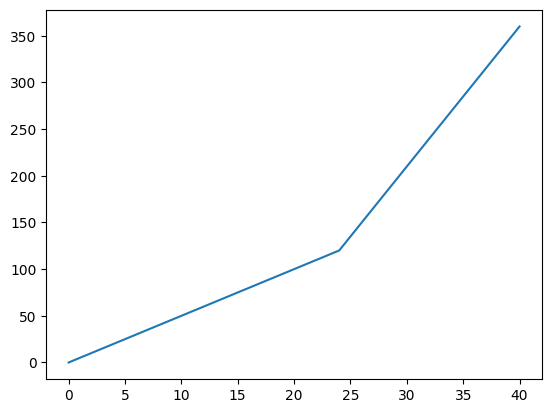

In [ ]:
A = np.matrix([[1,0,0,0,0,0,-1,0,0,0,0,1],
               [0,1,0,0,0,0,1,-1,0,0,0,0],
               [0,0,1,0,0,0,0,1,-1,0,0,0],
               [0,0,0,1,0,0,0,0,1,-1,0,0],
               [0,0,0,0,1,0,0,0,0,1,-1,0],
               [0,0,0,0,0,1,0,0,0,0,1,-1]])

ejex =[]
ejey =[]

for d0 in range(41):
  d1 = 0
  d2 = d3 = d4 = d5 = d6 = d0
  b = np.array([d1, d2, d3, d4, d5, d6])
  ytope = 60
  constraints = [A @ x == b,
                 x[0] >= 0,
                 x[1] == 0,
                 x[2] >= 0,
                 x[3] == 0,
                 x[4] == 0,
                 x[5] == 0,
                 #-x[0] >= -100,   # p1 <= 100
                 # p2, p4, p5, p6 no pueden producir, deben valer 0, no tendremos maximo no minimo
                 x[6] >= -ytope,
                 x[7] >= -ytope,
                 x[8] >= -ytope,
                 x[9] >= -ytope,
                 x[10] >= -ytope,
                 x[11] >= -ytope,
                 x[6] <= ytope,
                 x[7] <= ytope,
                 x[8] <= ytope,
                 x[9] <= ytope,
                 x[10] <= ytope,
                 x[11] <= ytope
               ]

  prob = cp.Problem(objective, constraints)
  result = prob.solve(solver = 'GLPK')
  ejex.append(d0)
  ejey.append(result)

plt.plot(ejex, ejey)

Supongamos que a partir de una demanda de 24 en todos los nodos (excepto el nodo 1), no es posible abastecer a todos los nodos únicamente con la producción del nodo 1. Cabe recordar que es más económico producir en el nodo 1 que en el nodo 3, por lo tanto, produciremos únicamente en el primer nodo hasta que no podamos "exportar" los productos del mismo. Este punto se alcanza cuando ambas líneas tienen un total de 60 productos saliendo del nodo 1, lo que equivale a una producción total de 120 productos en dicho nodo. Debido a esta limitación, necesitamos satisfacer la demanda con productos provenientes del nodo 3, los cuales tienen un mayor costo de producción. Esto resulta en un incremento en la pendiente de la gráfica a partir del valor 24.

A continuación, se presentan ejemplos de resultados que respaldan esta afirmación:

Para una demanda inicial (d0) de 24, se obtiene el siguiente vector de producción: [120. 0. 0. 0. 0. 0. 60. 36. 12. -12. -36. -60.]. Esto indica que se produjeron los 120 productos en el nodo 1.

Para una demanda inicial (d0) de 25, se obtiene el siguiente vector de producción: [120. 0. 5. 0. 0. 0. 60. 35. 15. -10. -35. -60.]. En este caso, se produjeron los 120 productos en el nodo 1, pero no se generaron más debido a la imposibilidad de "exportarlos". El resto de los productos necesarios se produjeron en el nodo 3.






d:

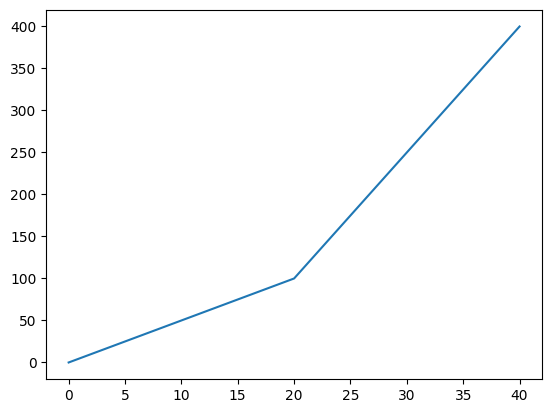

In [ ]:
A = np.matrix([[1,0,0,0,0,0,-1,0,0,0,0,1],
               [0,1,0,0,0,0,1,-1,0,0,0,0],
               [0,0,1,0,0,0,0,1,-1,0,0,0],
               [0,0,0,1,0,0,0,0,1,-1,0,0],
               [0,0,0,0,1,0,0,0,0,1,-1,0],
               [0,0,0,0,0,1,0,0,0,0,1,-1]])

ejex =[]
ejey =[]

for d0 in range(41):
  d1 = 0
  d2 = d3 = d4 = d5 = d6 = d0
  b = np.array([d1, d2, d3, d4, d5, d6])
  ytope = 60
  constraints = [A @ x == b,
                 x[0] >= 0,
                 x[1] == 0,
                 x[2] >= 0,
                 x[3] == 0,
                 x[4] == 0,
                 x[5] == 0,
                 x[0] <= 100,
                 # p2, p4, p5, p6 no pueden producir, deben valer 0
                 # p3 no tiene un limite maximo de produccion, solo el minimo (se puso un par de lineas arriba)
                 x[6] >= -ytope,
                 x[7] >= -ytope,
                 x[8] >= -ytope,
                 x[9] >= -ytope,
                 x[10] >= -ytope,
                 x[11] >= -ytope,
                 x[6] <= ytope,
                 x[7] <= ytope,
                 x[8] <= ytope,
                 x[9] <= ytope,
                 x[10] <= ytope,
                 x[11] <= ytope
               ]


  prob = cp.Problem(objective, constraints)
  result = prob.solve(solver = 'GLPK')
  ejex.append(d0)
  ejey.append(result)

plt.plot(ejex, ejey)

Vemos que lo que antes sucedía cuando d0 valía 24, ahora sucede cuando vale 20. Tiene sentido, baja la cantidad máxima de productos que puede producir el nodo 1 (antes no había limite, ahora puede producir hasta 100), por lo que se deberá comenzar a producir en el nodo 3 antes.

e:

In [ ]:
x = cp.Variable(13)
c = np.array([1.0 , 0.0 ,3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
objective = cp.Minimize(c.T @ x)

A = np.matrix([[1,0,0,0,0,0,-1,0,0,0,0,1,0] ,
               [0,1,0,0,0,0,1,-1,0,0,0,0,0],
               [0,0,1,0,0,0,0,1,-1,0,0,0,0] ,
               [0,0,0,1,0,0,0,0,1,-1,0,0,-1] ,
               [0,0,0,0,1,0,0,0,0,1,-1,0,0] ,
               [0,0,0,0,0,1,0,0,0,0,1,-1,1]])

d1 = 0
d0 = 40
d2 = d3 = d4 = d5 = d6 = d0
b = np.array([d1, d2, d3, d4, d5, d6])
ytope = 60
constraints = [A @ x == b,
               x[0] >= 0,
               x[1] == 0,
               x[2] >= 0,
               x[3] == 0,
               x[4] == 0,
               x[5] == 0,
               #-x[0] >= -100,   # p1 <= 100 (la letra dice eliminarla)
               # p2, p4, p5, p6 no pueden producir, deben valer 0, no tendremos maximo no minimo
               x[6] >= -ytope,
               x[7] >= -ytope,
               x[8] >= -ytope,
               x[9] >= -ytope,
               x[10] >= -ytope,
               x[11] >= -ytope,
               x[6] <= ytope,
               x[7] <= ytope,
               x[8] <= ytope,
               x[9] <= ytope,
               x[10] <= ytope,
               x[11] <= ytope,

               x[12] <= ytope,
               x[12] >= -ytope
               ]

prob = cp.Problem(objective, constraints)
result = prob.solve(solver = 'GLPK')

print(f"El nodo 1 produce {x.value[0]} y el nodo 3 produce {x.value[2]}, el resto por letra no producen")
print("La cantidad de exportados (positivos) o importados (negativos)")
print(f"Del 1 al 2: {x.value[6]}")
print(f"Del 2 al 3: {x.value[7]}")
print(f"Del 3 al 4: {x.value[8]}")
print(f"Del 4 al 5: {x.value[9]}")
print(f"Del 5 al 6: {x.value[10]}")
print(f"Del 6 al 1: {x.value[11]}")
print(f"Del puente nuevo: {x.value[12]}")
print(f"El costo resultante es ${result}")
print(f"Los datos en forma vectorial: {x.value}")

El nodo 1 produce 120.0 y el nodo 3 produce 80.0, el resto por letra no producen
La cantidad de exportados (positivos) o importados (negativos)
Del 1 al 2: 60.0
Del 2 al 3: 20.0
Del 3 al 4: 60.0
Del 4 al 5: 20.0
Del 5 al 6: -20.0
Del 6 al 1: -60.0
Del puente nuevo: 0.0
El costo resultante es $360.0
Los datos en forma vectorial: [120.   0.  80.   0.   0.   0.  60.  20.  60.  20. -20. -60.   0.]


Probando todos los puentes posibles (recordemos que son bidireccionales) podemos ver cual es el mejor para poner y optimizar.

Puente

 Desde | Hasta | d max | costo | uso   
 ----- | ----- | ----- | ----- | -----
1     | 3     | 40    | 240   | 60   
1     | 4     | 60   | 540  | 60   
 1     | 5     | 60   | 540  | 60   
 2     | 4     | 60   | 660  | 60   
2     | 5     | 60   | 660  | 60   
 2     | 6     | 60   | 660  | 60   
 3     | 5     | 60   | 660  | 60
 3     | 6     | 60   | 660  | 60
4     | 6     | 40    | 360  | 0     

Nos conviene poner un puente desde (1,4) o (1,5). Que envian lo producido en 1 a 4 y 5. Que no dependeran de 3

f:

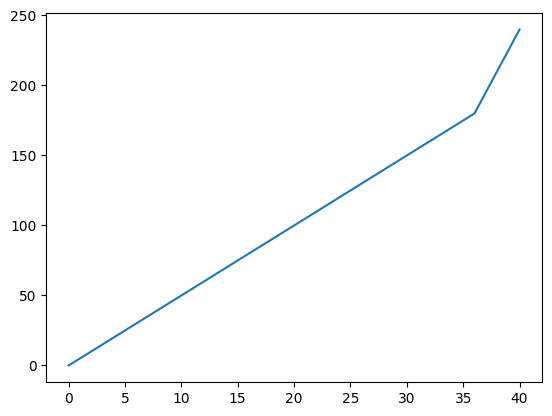

In [ ]:
x = cp.Variable(13)

c = np.array([1.0 , 0.0 ,3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
objective = cp.Minimize(c.T @ x)

A = np.matrix([[1,0,0,0,0,0,-1,0,0,0,0,1,-1],
               [0,1,0,0,0,0,1,-1,0,0,0,0,0],
               [0,0,1,0,0,0,0,1,-1,0,0,0,0],
               [0,0,0,1,0,0,0,0,1,-1,0,0,0],
               [0,0,0,0,1,0,0,0,0,1,-1,0,1],
               [0,0,0,0,0,1,0,0,0,0,1,-1,0]])

ejex =[]
ejey =[]

for d0 in range(41):
  d1 = 0
  d2 = d3 = d4 = d5 = d6 = d0
  b = np.array([d1, d2, d3, d4, d5, d6])
  ytope = 60
  constraints = [A @ x == b,
               x[0] >= 0,
               x[1] == 0,
               x[2] >= 0,
               x[3] == 0,
               x[4] == 0,
               x[5] == 0,
               # -x[0] >= -100,   # p1 <= 100
               # p2, p4, p5, p6 no pueden producir, deben valer 0.
               x[6] >= -ytope,
               x[7] >= -ytope,
               x[8] >= -ytope,
               x[9] >= -ytope,
               x[10] >= -ytope,
               x[11] >= -ytope,
               x[6] <= ytope,
               x[7] <= ytope,
               x[8] <= ytope,
               x[9] <= ytope,
               x[10] <= ytope,
               x[11] <= ytope,
               # Restricciones del puente nuevo
               x[12] <= ytope,
               x[12] >= -ytope
               ]


  prob = cp.Problem(objective, constraints)
  result = prob.solve(solver = 'GLPK')
  ejex.append(d0)
  ejey.append(result)

plt.plot(ejex, ejey)

g:

In [ ]:
x = cp.Variable(13)

c = np.array([1.0 , 0.0 ,3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
objective = cp.Minimize(c.T @ x)

A = np.matrix([[1,0,0,0,0,0,-1,0,0,0,0,1,0] ,
               [0,1,0,0,0,0,1,-1,0,0,0,0,0],
               [0,0,1,0,0,0,0,1,-1,0,0,0,-1] ,
               [0,0,0,1,0,0,0,0,1,-1,0,0,0] ,
               [0,0,0,0,1,0,0,0,0,1,-1,0,1] ,
               [0,0,0,0,0,1,0,0,0,0,1,-1,0]])

d1 = 0
d0 = 60
d2 = d3 = d4 = d5 = d6 = d0
b = np.array([d1, d2, d3, d4, d5, d6])
ytope = 60
constraints = [A @ x == b,
               x[0] >= 0,
               x[1] == 0,
               x[2] >= 0,
               x[3] == 0,
               x[4] == 0,
               x[5] == 0,
               -x[0] >= -100,   # p1 <= 100
               # p2, p4, p5, p6 no pueden producir, deben valer 0.
               x[6] >= -ytope,
               x[7] >= -ytope,
               x[8] >= -ytope,
               x[9] >= -ytope,
               x[10] >= -ytope,
               x[11] >= -ytope,
               x[6] <= ytope,
               x[7] <= ytope,
               x[8] <= ytope,
               x[9] <= ytope,
               x[10] <= ytope,
               x[11] <= ytope,
               # Restricciones del puente nuevo
               x[12] <= ytope,
               x[12] >= -ytope
               ]

prob = cp.Problem(objective, constraints)
result = prob.solve(solver = 'GLPK')

print(f"El nodo 1 produce {x.value[0]} y el nodo 3 produce {x.value[2]}, el resto por letra no producen")
print("La cantidad de exportados (positivos) o importados (negativos)")
print(f"Del 1 al 2: {x.value[6]}")
print(f"Del 2 al 3: {x.value[7]}")
print(f"Del 3 al 4: {x.value[8]}")
print(f"Del 4 al 5: {x.value[9]}")
print(f"Del 5 al 6: {x.value[10]}")
print(f"Del 6 al 1: {x.value[11]}")
print(f"Del puente nuevo: {x.value[12]}")
print(f"El costo resultante es ${result}")
print(f"Los datos en forma vectorial: {x.value}")

El nodo 1 produce 100.0 y el nodo 3 produce 200.0, el resto por letra no producen
La cantidad de exportados (positivos) o importados (negativos)
Del 1 al 2: 40.0
Del 2 al 3: -20.0
Del 3 al 4: 60.0
Del 4 al 5: 0.0
Del 5 al 6: 0.0
Del 6 al 1: -60.0
Del puente nuevo: 60.0
El costo resultante es $700.0
Los datos en forma vectorial: [100.   0. 200.   0.   0.   0.  40. -20.  60.   0.   0. -60.  60.]


Probando todos los puentes posibles llegamos a los siguientes valores:

| Desde | Hasta | d max | costo | uso   |
| ----- | ----- | ----- | ----- | ----- |
| 1     | 3     | 40    | 400  | 0  |
| 1     | 4     | 55    | 625  | 45    |
| 1     | 5     | 55    | 625  | 45    |
| 2     | 4     | 55    | 625  | 50    |
| 2     | 5     | 55    | 625  | 50    |
| 2     | 6     | 55    | 625  | 50  |
| 3     | 5     | 60   | 700  | 60 |
| 3     | 6     | 60   | 700  | 60 |
| 4     | 6     | 40    | 400  | 0 |

Vemos que conviene incorporar el enlace que va del 3 al 5 o del 3 al 6, ya que son los que maximizan d.

Veamos los resultados con ese enlace (y35):

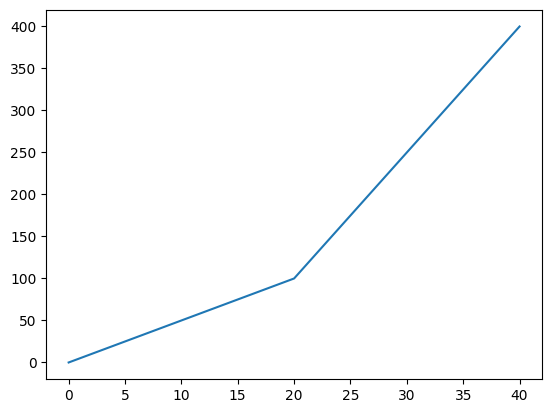

In [ ]:
x = cp.Variable(13)

c = np.array([1.0 , 0.0 ,3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
objective = cp.Minimize(c.T @ x)

A = np.matrix([[1,0,0,0,0,0,-1,0,0,0,0,1,0],
               [0,1,0,0,0,0,1,-1,0,0,0,0,0],
               [0,0,1,0,0,0,0,1,-1,0,0,0,-1],
               [0,0,0,1,0,0,0,0,1,-1,0,0,0],
               [0,0,0,0,1,0,0,0,0,1,-1,0,1],
               [0,0,0,0,0,1,0,0,0,0,1,-1,0]])

ejex =[]
ejey =[]

for d0 in range(41):
  d1 = 0
  d2 = d3 = d4 = d5 = d6 = d0
  b = np.array([d1, d2,d3,d4,d5,d6])
  ytope = 60
  constraints = [A @ x == b,
               x[0] >= 0,
               x[1] == 0,
               x[2] >= 0,
               x[3] == 0,
               x[4] == 0,
               x[5] == 0,
               x[0] <= 100,

               x[6] >= -ytope,
               x[7] >= -ytope,
               x[8] >= -ytope,
               x[9] >= -ytope,
               x[10] >= -ytope,
               x[11] >= -ytope,
               x[6] <= ytope,
               x[7] <= ytope,
               x[8] <= ytope,
               x[9] <= ytope,
               x[10] <= ytope,
               x[11] <= ytope,

               x[12] <= ytope,
               x[12] >= -ytope
               ]

  prob = cp.Problem(objective, constraints)

  result = prob.solve(solver = 'GLPK')
  ejex.append(d0)
  ejey.append(result)

plt.plot(ejex, ejey)
